In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('HR_comma_sep.xlsx')
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data['salary']=l.fit_transform(data['salary'])
# sns.countplot(data['salary'])
data=data.drop(columns=['sales'])
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,1
1,0.80,0.86,5,262,6,0,1,0,2
2,0.11,0.88,7,272,4,0,1,0,2
3,0.72,0.87,5,223,5,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,1


In [5]:
import warnings
# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
salary                   0
dtype: int64

<Axes: xlabel='salary', ylabel='count'>

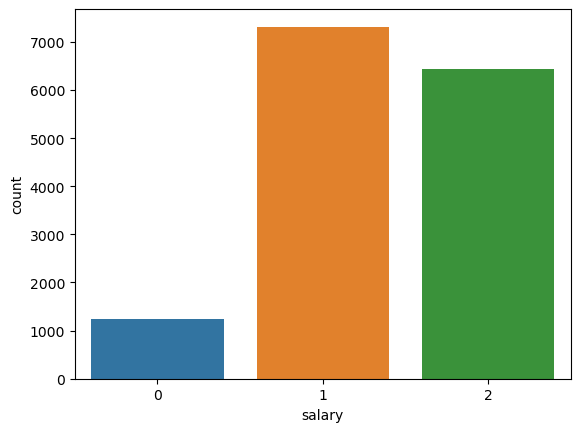

In [7]:
sns.countplot(data,x='salary')

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
salary,14999.0,1.347290,0.625819,0.00,1.00,1.00,2.00,2.0


In [12]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]
print('\nX shape:\t',x.shape)
print('\nY Shape:\t',y.shape)


X shape:	 (14999, 8)

Y Shape:	 (14999, 1)


In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score
from sklearn.model_selection import train_test_split
y = y.values.ravel()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=6)
print('\n*****Training Data Shape" *******\n')
print("\nTraining data-X- Shape:\t",xtrain.shape)
print("\nTraining data-y- Shape:\t",ytrain. shape)
print('\n***************Testing Data Shape***************\n')
print('\nTesting data (x-Input) Shape:\t',xtest.shape)
print('\nTesting data (y-Outcome) Shape:\t',ytest.shape)


*****Training Data Shape" *******


Training data-X- Shape:	 (11999, 8)

Training data-y- Shape:	 (11999,)

***************Testing Data Shape***************


Testing data (x-Input) Shape:	 (3000, 8)

Testing data (y-Outcome) Shape:	 (3000,)


In [16]:
from sklearn.naive_bayes import GaussianNB
gaus_nb=GaussianNB()
gaus_nb.fit(xtrain,ytrain)
print('\nTraining Completed')
ypred_gaus=gaus_nb.predict(xtest)
print('\nPredicted values :\t',ypred_gaus)
print('\nTesting Completed')
print('\n*****Performance measure for GAUSSIAN NB classification" *******\n')
print("\n****************************** "*2)
Accuracy_gaus=accuracy_score(ytest,ypred_gaus)
print("\nAccuracy Score :\t",accuracy_score(ytest,ypred_gaus))

print("\n****************************** "*2)
      
print("\nConfusion Matrix:\n\n",confusion_matrix(ytest,ypred_gaus))

print("\n****************************** "*2)

print('\nClassification Report : \n\n',classification_report(ytest,ypred_gaus))



Training Completed

Predicted values :	 [1 1 0 ... 1 1 1]

Testing Completed

*****Performance measure for GAUSSIAN NB classification" *******


****************************** 
****************************** 

Accuracy Score :	 0.49233333333333335

****************************** 
****************************** 

Confusion Matrix:

 [[  27  208    9]
 [  38 1416   13]
 [  70 1185   34]]

****************************** 
****************************** 

Classification Report : 

               precision    recall  f1-score   support

           0       0.20      0.11      0.14       244
           1       0.50      0.97      0.66      1467
           2       0.61      0.03      0.05      1289

    accuracy                           0.49      3000
   macro avg       0.44      0.37      0.29      3000
weighted avg       0.52      0.49      0.36      3000



In [18]:
from sklearn.naive_bayes import MultinomialNB
mult_nb=MultinomialNB()
mult_nb.fit(xtrain,ytrain)
print('\nTraining Completed')
ypred_mult_nb=mult_nb.predict(xtest)
print('\nPredicted values :\t',ypred_mult_nb)
print('\nTesting Completed')
print('\n*****Performance measure for Multinomial NB classification" *******\n')
print("\n****************************** "*2)
Accuracy_mult_nb=accuracy_score(ytest,ypred_mult_nb)
print("\nAccuracy Score :\t",accuracy_score(ytest,ypred_mult_nb))

print("\n****************************** "*2)
      
print("\nConfusion Matrix:\n\n",confusion_matrix(ytest,ypred_mult_nb))

print("\n****************************** "*2)

print('\nClassification Report : \n\n',classification_report(ytest,ypred_mult_nb,zero_division=0))



Training Completed

Predicted values :	 [1 1 2 ... 1 1 1]

Testing Completed

*****Performance measure for Multinomial NB classification" *******


****************************** 
****************************** 

Accuracy Score :	 0.506

****************************** 
****************************** 

Confusion Matrix:

 [[   0  205   39]
 [   0 1402   65]
 [   0 1173  116]]

****************************** 
****************************** 

Classification Report : 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       244
           1       0.50      0.96      0.66      1467
           2       0.53      0.09      0.15      1289

    accuracy                           0.51      3000
   macro avg       0.34      0.35      0.27      3000
weighted avg       0.47      0.51      0.39      3000



# Bernoulli NB

In [20]:
from sklearn.naive_bayes import BernoulliNB
ber_nb=BernoulliNB()
ber_nb.fit(xtrain,ytrain)
print('\nTraining Completed')
ypred_ber_nb=ber_nb.predict(xtest)
print('\nPredicted values :\t',ypred_ber_nb)
print('\nTesting Completed')
print('\n*****Performance measure for Bernoulli NB classification" *******\n')
print("\n****************************** "*2)
Accuracy_ber_nb=accuracy_score(ytest,ypred_ber_nb)
print("\nAccuracy Score :\t",accuracy_score(ytest,ypred_ber_nb))

print("\n****************************** "*2)
      
print("\nConfusion Matrix:\n\n",confusion_matrix(ytest,ypred_ber_nb))

print("\n****************************** "*2)

print('\nClassification Report : \n\n',classification_report(ytest,ypred_ber_nb,zero_division=0))



Training Completed

Predicted values :	 [1 1 2 ... 1 1 1]

Testing Completed

*****Performance measure for Bernoulli NB classification" *******


****************************** 
****************************** 

Accuracy Score :	 0.482

****************************** 
****************************** 

Confusion Matrix:

 [[   0  200   44]
 [   0 1252  215]
 [   0 1095  194]]

****************************** 
****************************** 

Classification Report : 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       244
           1       0.49      0.85      0.62      1467
           2       0.43      0.15      0.22      1289

    accuracy                           0.48      3000
   macro avg       0.31      0.33      0.28      3000
weighted avg       0.42      0.48      0.40      3000



# Ensemble model

# 1.Bagging Classifier

In [32]:
from sklearn.ensemble import BaggingClassifier

bagc=BaggingClassifier(base_estimator=gaus_nb,n_estimators=5, random_state=12)
bagc.fit(xtrain,ytrain)
ypred_bagc=bagc.predict(xtest)
print('='*100)
print('Confusion Matrix:\n', confusion_matrix(ytest, ypred_bagc))
print('='*100)
Accuracy_bagc=accuracy_score (ytest, ypred_bagc)
print('Accuracy Score:\t', Accuracy_bagc)
print('='*100)
print('Classification Report: \n', classification_report (ytest,ypred_bagc))
print('='*100)

Confusion Matrix:
 [[  28  209    7]
 [  38 1419   10]
 [  70 1190   29]]
Accuracy Score:	 0.492
Classification Report: 
               precision    recall  f1-score   support

           0       0.21      0.11      0.15       244
           1       0.50      0.97      0.66      1467
           2       0.63      0.02      0.04      1289

    accuracy                           0.49      3000
   macro avg       0.45      0.37      0.28      3000
weighted avg       0.53      0.49      0.35      3000



# Random Forest Classifier Model

In [33]:
from sklearn.ensemble import RandomForestClassifier

ran_for=RandomForestClassifier(n_estimators=5, random_state=1)
ran_for.fit(xtrain,ytrain)
ypred_ran_for=ran_for.predict(xtest)
print('='*100)
print('Confusion Matrix:\n', confusion_matrix(ytest, ypred_ran_for))
print('='*100)
Accuracy_ran_for=accuracy_score (ytest, ypred_ran_for)
print('Accuracy Score:\t', Accuracy_ran_for)
print('='*100)
print('Classification Report: \n', classification_report (ytest,ypred_ran_for))
print('='*100)

Confusion Matrix:
 [[ 77  94  73]
 [ 66 981 420]
 [ 65 484 740]]
Accuracy Score:	 0.5993333333333334
Classification Report: 
               precision    recall  f1-score   support

           0       0.37      0.32      0.34       244
           1       0.63      0.67      0.65      1467
           2       0.60      0.57      0.59      1289

    accuracy                           0.60      3000
   macro avg       0.53      0.52      0.53      3000
weighted avg       0.60      0.60      0.60      3000



In [36]:
from sklearn.ensemble import RandomForestClassifier

ran_for=RandomForestClassifier(n_estimators=5, random_state=1,max_depth=3)
ran_for.fit(xtrain,ytrain)
ypred_ran_for=ran_for.predict(xtest)
print('='*100)
print('Confusion Matrix:\n', confusion_matrix(ytest, ypred_ran_for))
print('='*100)
Accuracy_ran_for_pru=accuracy_score (ytest, ypred_ran_for)
print('Accuracy Score:\t', Accuracy_ran_for_pru)
print('='*100)
print('Classification Report: \n', classification_report (ytest,ypred_ran_for,zero_division=0))
print('='*100)

Confusion Matrix:
 [[   0  198   46]
 [   0 1374   93]
 [   0 1146  143]]
Accuracy Score:	 0.5056666666666667
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       244
           1       0.51      0.94      0.66      1467
           2       0.51      0.11      0.18      1289

    accuracy                           0.51      3000
   macro avg       0.34      0.35      0.28      3000
weighted avg       0.47      0.51      0.40      3000



# Extra Trees Model

In [35]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree=ExtraTreesClassifier(n_estimators=10,bootstrap=True,verbose=2)
extra_tree.fit(xtrain,ytrain)
ypred_extra_tree=extra_tree.predict(xtest)
print('='*100)
print('Confusion Matrix:\n', confusion_matrix(ytest, ypred_extra_tree))
print('='*100)
Accuracy_extra_tree=accuracy_score (ytest, ypred_extra_tree)
print('Accuracy Score:\t', Accuracy_extra_tree)
print('='*100)
print('Classification Report: \n', classification_report (ytest,ypred_extra_tree))
print('='*100)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
Confusion Matrix:
 [[  76   95   73]
 [  27 1023  417]
 [  32  526  731]]
Accuracy Score:	 0.61
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.31      0.40       244
           1       0.62      0.70      0.66      1467
           2       0.60      0.57      0.58      1289

    accuracy                           0.61      3000
   macro avg       0.59      0.53      0.55      3000
weighted avg       0.61      0.61      0.60      3000



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


# Model with Accuracy Scores

In [38]:
scores=[('Gaussian_NB', Accuracy_gaus),
        ('Multinomial NB', Accuracy_mult_nb),
        ('Bernoulli_NB', Accuracy_ber_nb),
        ('Bagging_classifier', Accuracy_bagc),
        ('RandomForest Classifier', Accuracy_ran_for),
        ('RandomForest Classifier with pruning', Accuracy_ran_for_pru),
        ('ExtraTrees Classifier', Accuracy_extra_tree)
       ]

Accu_scores=pd.DataFrame(scores, columns=['Model', 'Accuracy_score'])

print (Accu_scores.sort_values (by='Accuracy_score', ascending=False))

                                  Model  Accuracy_score
6                 ExtraTrees Classifier        0.610000
1                        Multinomial NB        0.506000
4               RandomForest Classifier        0.505667
5  RandomForest Classifier with pruning        0.505667
0                           Gaussian_NB        0.492333
3                    Bagging_classifier        0.492000
2                          Bernoulli_NB        0.482000


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Gaussian_NB'),
  Text(1, 0, 'Multinomial NB'),
  Text(2, 0, 'Bernoulli_NB'),
  Text(3, 0, 'Bagging_classifier'),
  Text(4, 0, 'RandomForest Classifier'),
  Text(5, 0, 'RandomForest Classifier with pruning'),
  Text(6, 0, 'ExtraTrees Classifier')])

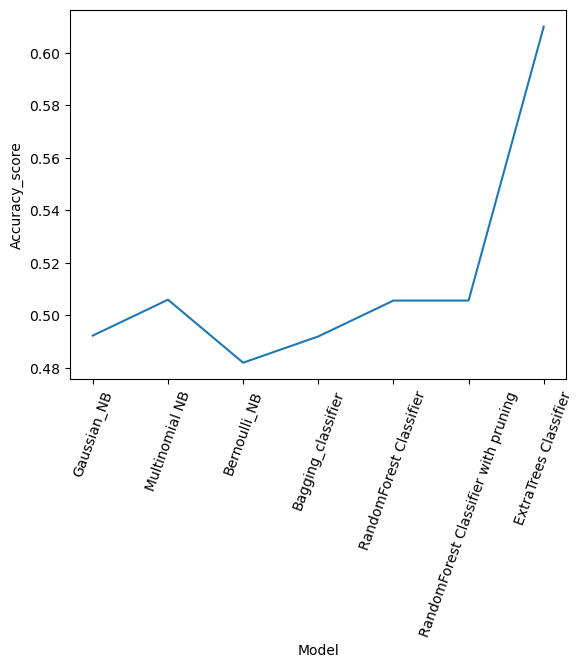

In [40]:
sns.lineplot(x=Accu_scores['Model'],y=Accu_scores['Accuracy_score'],data=Accu_scores)
plt.xticks(rotation=70)